# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---

## Step 1: Dataset Exploration

Visualize the German Traffic Signs Dataset. This is open ended, some suggestions include: plotting traffic signs images, plotting the count of each sign, etc. Be creative!


The pickled data is a dictionary with 4 key/value pairs:

- features -> the images pixel values, (width, height, channels)
- labels -> the label of the traffic sign
- sizes -> the original width and height of the image, (width, height)
- coords -> coordinates of a bounding box around the sign in the image, (x1, y1, x2, y2). Based the original image (not the resized version).

In [1]:
import pickle
import numpy as np
%matplotlib inline

# fill this in based on where you saved the training and testing data
training_file = 'traffic-signs-data/train.p'
testing_file =  'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

In [2]:
# number of training examples
n_train = y_train.shape[0]

# number of testing examples
n_test = y_test.shape[0]

# what's the shape of an image?
image_shape = X_train[0].shape

# how many classes are in the dataset
n_classes = np.unique(y_train).shape[0]

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Training file

In [3]:
print(training_file)

traffic-signs-data/train.p


### Testing file

In [4]:
print(testing_file)

traffic-signs-data/test.p


### Show columns and class names in the signnames.csv file

In [5]:
import pandas

sign_name = pandas.read_csv("signnames.csv")
print(sign_name)

    ClassId                                           SignName
0         0                               Speed limit (20km/h)
1         1                               Speed limit (30km/h)
2         2                               Speed limit (50km/h)
3         3                               Speed limit (60km/h)
4         4                               Speed limit (70km/h)
5         5                               Speed limit (80km/h)
6         6                        End of speed limit (80km/h)
7         7                              Speed limit (100km/h)
8         8                              Speed limit (120km/h)
9         9                                         No passing
10       10       No passing for vechiles over 3.5 metric tons
11       11              Right-of-way at the next intersection
12       12                                      Priority road
13       13                                              Yield
14       14                                            

### Plotting file Image example

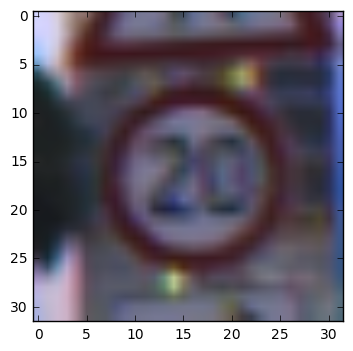

In [6]:
import matplotlib.pyplot as plt

image = X_test[y_test==0][9]
plt.imshow(image)
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Your model can be derived from a deep feedforward net or a deep convolutional network.
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

### Question 1 
What technique was used by you to preprocess the data?

**Answer:** 
The techniques used by me to preprocess the data are concatinating the data, then splitting the data into training/testing sets, with 33% train data, also I have been plotting an example image and I listed all columns and classnames in the sign names file.

In [8]:
def grayscale(_x):
    """
    Converts the array of images into grayscale
    
    Parameters
    ----------
    _x: The numpy array of images. Should be 4D (samples, h, w, d)
    return: Numpy array of grayscale images
    """
    ret = []
    for i in np.arange(_x.shape[0]):
        ret.append(cv2.cvtColor(_x[i,:,:,:], cv2.COLOR_BGR2GRAY))
    
    return np.array(ret)

def equalize(_x):
    """
    Equalizes the image histogram and also normalizes the image
    
    Parameters
    ----------
    _x: The numpy array of grayscale images. Should be 3D (samples, h, w)
    return: Processed image data
    """
    ret = []
    for img in _x:
        ret.append(exposure.equalize_adapthist(img))
        
    return np.array(ret)

def OneHot(_x):
    """
    Turns the labels into a one hot encoded vector
    
    Parameters
    ----------
    _x: The numpy array of labels. Should be 1D
    """
    encoder = LabelBinarizer()
    one_hot_encoded = encoder.fit_transform(_x)
    return one_hot_encoded


print('Success: Preprocessing functions loaded.')

Success: Preprocessing functions loaded.


In [15]:
import cv2

# Preprocess Data
X_train = equalize(grayscale(X_train))
X_test = equalize(grayscale(X_test))
y_train = OneHot(y_train)
y_test = OneHot(y_test)

print('Success: Data preprocessed.')

NameError: name 'exposure' is not defined

### Question 2

_Describe how you set up the training, validation and testing data for your model. If you generated additional data, why?_

**Answer:** I used the import train_test_split module form sklearn.model_selection to set up the training, validation and testing data for my model.

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:** I used to set up a Neural network like we learned in class, ........................

In [28]:
import tensorflow as tf
from tensorflow.python.ops.variables import Variable

In [12]:
def LeNet(x):
    # Reshape from 2D to 4D. This prepares the data for
    # convolutional and pooling layers.
    x = tf.reshape(x, (-1, 28, 28, 1))
    # Pad 0s to 32x32. Centers the digit further.
    # Add 2 rows/columns on each side for height and width dimensions.
    x = tf.pad(x, [[0, 0], [2, 2], [2, 2], [0, 0]], mode="CONSTANT")

    # 28x28x6
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6)))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1 = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    conv1 = tf.nn.relu(conv1)

    # 14x14x6
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # 10x10x16
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16)))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2 = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b

    conv2 = tf.nn.relu(conv2)

    # 5x5x16
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten
    fc1 = flatten(conv2)
    # (5 * 5 * 16, 120)
    fc1_shape = (fc1.get_shape().as_list()[-1], 120)

    fc1_W = tf.Variable(tf.truncated_normal(shape=(fc1_shape)))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1 = tf.matmul(fc1, fc1_W) + fc1_b
    fc1 = tf.nn.relu(fc1)

    fc2_W = tf.Variable(tf.truncated_normal(shape=(120, 10)))
    fc2_b = tf.Variable(tf.zeros(10))
    return tf.matmul(fc1, fc2_W) + fc2_b

In [29]:
input = tf.placeholder(tf.float32, (None, 32, 32, 3))
filter_weights = tf.Variable(tf.truncated_normal((8, 8, 3, 20))) # (height, width, input_depth, output_depth)
filter_bias = tf.Variable(tf.zeros(20))
strides = [1, 2, 2, 1] # (batch, height, width, depth)
padding = 'VALID'
conv = tf.nn.conv2d(input, filter_weights, strides, padding) + filter_bias

H = height, W = width, D = depth

NameError: name 'depth' is not defined

### Algorithm course 2

In [25]:
# Output depth
k_output = 64

# Image Properties
image_width = 10
image_height = 10
color_channels = 3

# Convolution filter
filter_size_width = 5
filter_size_height = 5

# Input/Image
input = tf.placeholder(
    tf.float32,
    shape=[None, image_width, image_height, color_channels])

# Weight and bias
weight = tf.Variable(tf.truncated_normal(
    [filter_size_width, filter_size_height, color_channels, k_output]))
bias = tf.Variable(tf.zeros(k_output))

# Apply Convolution
conv_layer = tf.nn.conv2d(input, weight, strides=[1, 2, 2, 1], padding='SAME')
# Add bias
conv_layer = tf.nn.bias_add(conv_layer, bias)
# Apply activation function
conv_layer = tf.nn.relu(conv_layer)

In [26]:
out = conv2d(X)
print(out)

Tensor("add_7:0", shape=(1, 2, 2, 3), dtype=float32)


### Algorithm course 3 = Algorithm 2 + MaX POOLING FUNCTION!

In [27]:
# Output depth
k_output = 64

# Image Properties
image_width = 10
image_height = 10
color_channels = 3

# Convolution filter
filter_size_width = 5
filter_size_height = 5

# Input/Image
input = tf.placeholder(
    tf.float32,
    shape=[None, image_width, image_height, color_channels])

# Weight and bias
weight = tf.Variable(tf.truncated_normal(
    [filter_size_width, filter_size_height, color_channels, k_output]))
bias = tf.Variable(tf.zeros(k_output))

# Apply Convolution
conv_layer = tf.nn.conv2d(input, weight, strides=[1, 2, 2, 1], padding='SAME')
# Add bias
conv_layer = tf.nn.bias_add(conv_layer, bias)
# Apply activation function
conv_layer = tf.nn.relu(conv_layer)

#########################################

# Apply Max Pooling
conv_layer = tf.nn.max_pool(
    conv_layer,
    ksize=[1, 2, 2, 1],
    strides=[1, 2, 2, 1],
    padding='SAME')

### Max pooling code:

### Mean pooling code:

### Algorithm Deeplearning seen in class You've seen how to build a logistic classifier using TensorFlow. Now you're going to see how to use the logistic classifier to build a deep neural network.

In [13]:
import tensorflow as tf

# Parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100
display_step = 1

n_input = 784  # MNIST data input (img shape: 28*28)
n_classes = 10  # MNIST total classes (0-9 digits)

n_hidden_layer = 256 # layer number of features

# Store layers weight & bias
weights = {
    'hidden_layer': tf.Variable(tf.random_normal([n_input, n_hidden_layer])),
    'out': tf.Variable(tf.random_normal([n_hidden_layer, n_classes]))
}
biases = {
    'hidden_layer': tf.Variable(tf.random_normal([n_hidden_layer])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

# tf Graph input
x = tf.placeholder("float", [None, 28, 28, 1])
y = tf.placeholder("float", [None, n_classes])

x_flat = tf.reshape(x, [-1, n_input])

# Hidden layer with RELU activation
layer_1 = tf.add(tf.matmul(x_flat, weights['hidden_layer']), biases['hidden_layer'])
layer_1 = tf.nn.relu(layer_1)
# Output layer with linear activation
logits = tf.matmul(layer_1, weights['out']) + biases['out']


# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits, y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

# Initializing the variables
init = tf.initialize_all_variables()


# Launch the graph
with tf.Session() as sess:
    sess.run(init)
    # Training cycle
    for epoch in range(training_epochs):
        total_batch = int(mnist.train.num_examples/batch_size)
    for i in range(total_batch):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
            # Run optimization op (backprop) and cost op (to get loss value)
        sess.run(optimizer, feed_dict={x: batch_x, y: batch_y})

Instructions for updating:
Use `tf.global_variables_initializer` instead.


NameError: name 'mnist' is not defined

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

### Question 5


_What approach did you take in coming up with a solution to this problem?_

**Answer:**

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [3]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It would be helpful to plot the images in the notebook._



**Answer:**

In [4]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

### Question 7

_Is your model able to perform equally well on captured pictures or a live camera stream when compared to testing on the dataset?_


**Answer:**

In [ ]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.11/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*


**Answer:**

### Question 9
_If necessary, provide documentation for how an interface was built for your model to load and classify newly-acquired images._


**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.